In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')
print(df.head())

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [3]:
# decide the x and y
x = df.drop(['Purchased', 'User ID', 'Gender'], axis=1)
y = df['Purchased']

In [20]:
# split the data into train and test datasets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=123456)

#### SVM model

In [39]:
from sklearn.svm import SVC

# create the model 
model = SVC(kernel="linear", C=2.0)

# train the model
model.fit(x_train, y_train)

SVC(C=2.0)

#### Evaluation

In [40]:
# predict the values
y_prediction = model.predict(x_test)
# print(y_prediction)

In [41]:
# confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_prediction)
print(cm)

[[55  1]
 [11 13]]


In [42]:
# accuracy
from sklearn.metrics import accuracy_score

print(f"accuracy = {accuracy_score(y_test, y_prediction) * 100 :0.2f} %")

accuracy = 85.00 %


In [25]:
# classsification report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90        56
           1       0.93      0.54      0.68        24

    accuracy                           0.85        80
   macro avg       0.88      0.76      0.79        80
weighted avg       0.86      0.85      0.84        80



In [12]:
# RoC score
from sklearn.metrics import roc_auc_score

print(f"roc auc score = {roc_auc_score(y_test, y_prediction)}")

roc auc score = 0.7619047619047618


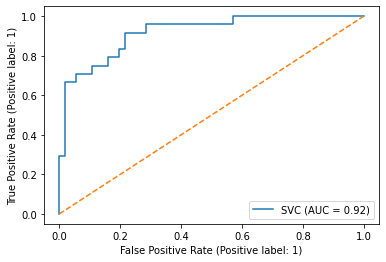

In [14]:
# AuC 
from sklearn.metrics import plot_roc_curve

plot_roc_curve(model, x_test, y_test)
plt.plot([0, 1], [0, 1], linestyle="--")